In [20]:
import pandas as pd #import pandas
import numpy as np #import numpy
import seaborn as sns#import seaborn
import matplotlib.pyplot as plt #import mat
from sklearn.cluster import KMeans #import sklearn.cluster######## this is required to use KMeans with cluster ml

In [21]:
data =pd.read_csv("student.csv ");# csv file is pushed to data

In [22]:
data.head() #check  top header columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [23]:
data.shape # checking data structure

(649, 33)

In [24]:
data.drop(["school"],axis=1) #drop this is use to drop unnecessary data from the table

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,4,0,11,11
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,2,9,11,11
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,6,12,13,12
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,0,14,14,14
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
645,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
646,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
647,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [25]:
data.describe() #display the description of the data

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [26]:
data.columns # this is the columns of the data

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

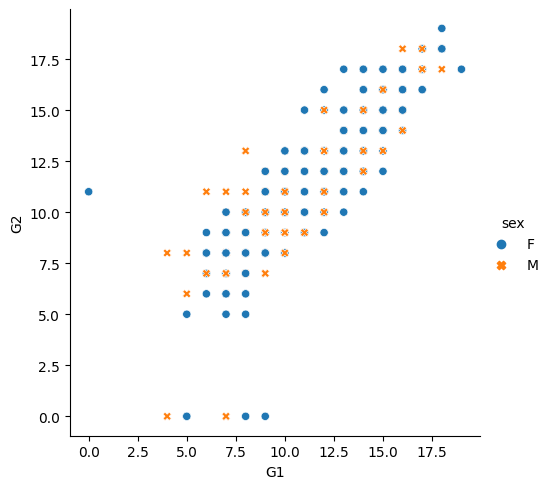

In [27]:
sns.relplot(x="G1", y='G2', hue='sex',data=data,style="sex")# i have used this to plot the relationship between sex and grades of the two sudjects 
plt.show() # used to plot graphs the relationship between sex and grades of the two

C:\Users\nitin\AppData\Local\Temp\ipykernel_10568\3782226016.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["G1"])


<AxesSubplot: xlabel='G1', ylabel='Density'>

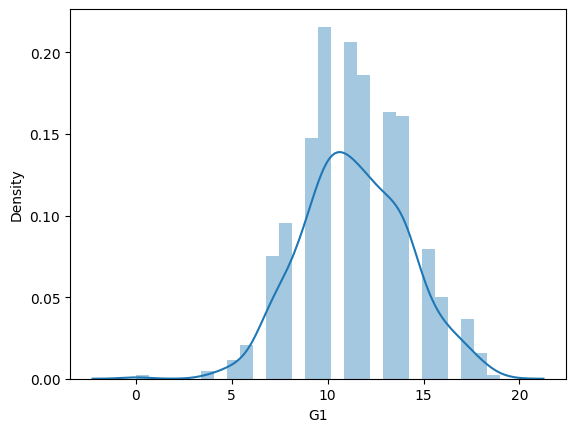

In [28]:
sns.distplot(data["G1"]) #using the seabon libaries the distribution graphs are plotted

In [29]:
x = data.iloc[:, [13, 23]].values   #here i have selected the data from the table with 14 column and 23 column
print(x)

[[2 4]
 [2 5]
 [2 4]
 ...
 [2 1]
 [1 2]
 [1 4]]


C:\Users\nitin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\nitin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

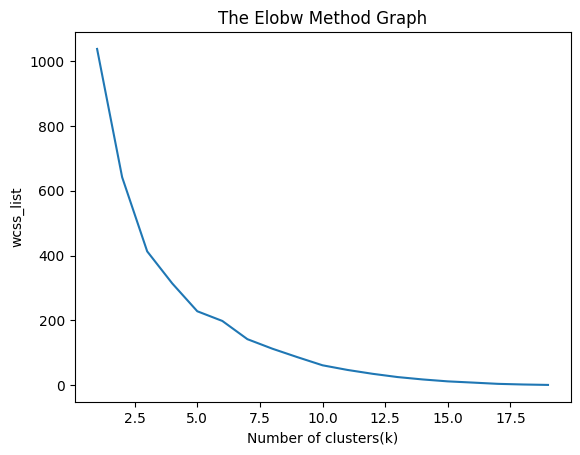

In [33]:

##Python Implementation of K-means Clustering Algorithm
######################################################################################################################################################............
##WCSS= ∑Pi in Cluster1 distance(Pi C1)2 +∑Pi in Cluster2distance(Pi C2)2+∑Pi in CLuster3 distance(Pi C3)2
##################################################################################################################################################........
#Elbow Method
#############################################################################################################################.......
#WCSS stands for Within Cluster Sum of Squares
##################################################################################################################.....
#main this method is used to calculate the squared distance between two clusters    
###################################################################################################.....

wcss_list= []  #Initializing the list for the values of WCSS  
for i in range(1, 20):  #range taken from 1 to 20 020 20 20 20
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 20), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [34]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=7, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

C:\Users\nitin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


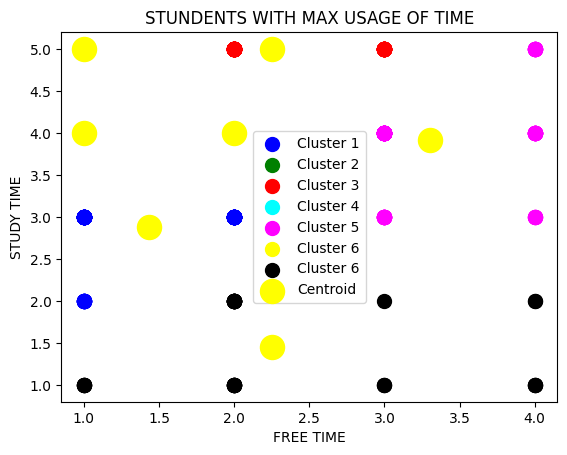

In [35]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')#for fifth cluster  
plt.scatter(x[y_predict == 5, 0], x[y_predict == 5, 1], s = 100, c = 'yellow', label = 'Cluster 6')#for sixth cluster  
plt.scatter(x[y_predict == 6, 0], x[y_predict == 6, 1], s = 100, c = 'black', label = 'Cluster 6')#for seventh cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid') #reference cluster so called centroid  
plt.title('STUNDENTS WITH MAX USAGE OF TIME')  
plt.xlabel('FREE TIME')  
plt.ylabel('STUDY TIME')  
plt.legend()  
plt.show()  